In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure
import tweets_utils
import importlib
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Verified create df](#verified)
- [Merge CCDH df](#merge_df)
- [Disinform Dozen behaviour](#ccdh_behaviour)

### Verified df
<a id="verified"/>

In [2]:
files_users = glob.glob("F:/COVID-19-Tweets/*/users.csv")
files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [4]:
names = []
users = []
verified = []
cols_users = [u'id', u'screen_name', u'verified'] 

cols_tweets = [
    u'user_id',u'user_screen_name', u'hashtags', u'urls',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id', 
    u'rt_created_at', u'in_reply_to_status_id'
              ]

In [56]:
chunksize = 10
for chunk in pd.read_csv(files_tweets[0], chunksize=10, lineterminator = '\n'):
    df = chunk
    break
df.info()

In [55]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_users:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_users, False))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["users"])
        verified.extend(lista[i]["verified"])
        
for i in range(len(users)):
    if(verified[i] == True):
        names.append(users[i])
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [54]:
names = list(pd.Series(names).unique())
names

In [53]:
result = []
data = pd.DataFrame()
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, names))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        data = data.append(lista[i]["df"])
    print(len(data))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [52]:
data = data.reset_index(drop=True)
data

### Merge CCDH
<a id="merge_df"/>

In [3]:
path =  glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
path

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/']

In [4]:
# data.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/verified_tweets.csv", index=False)

In [5]:
cols = [
    u'id',u'user_id',u'user_screen_name',u'urls', u'hashtags',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id']

In [51]:
ccdh_original_complete = pd.read_csv(path[0] + "ccdh_tweets.csv", usecols = cols)
ccdh_original_complete

In [48]:
ccdh_rt_complete = pd.read_csv(path[0] + "ccdh_retweets.csv", usecols = cols)
ccdh_rt_complete

In [47]:
ccdh_rt_searched = pd.read_csv(path[0] + "ccdh_user_rt.csv")
ccdh_rt_searched

In [46]:
ccdh_rp_searched = pd.read_csv(path[0] + "ccdh_user_rp.csv")
ccdh_rp_searched

In [45]:
ccdh_original_searched = pd.read_csv(path[0] + "ccdh_original.csv")
ccdh_original_searched

In [32]:
df = ccdh_original_complete.append(ccdh_rt_searched)
df = df.append(ccdh_rt_complete)
df = df.append(ccdh_rp_searched)
df = df.append(ccdh_original_searched)

In [33]:
df = df.reset_index(drop=True)

In [34]:
df.drop_duplicates(subset ="id", keep = False, inplace = True)

In [44]:
# df

In [41]:
new_l = len(df)
old_sum = len(ccdh_original_complete) + len(ccdh_rt_complete) + len(ccdh_rt_searched) + len(ccdh_rp_searched) + len(ccdh_original_searched)
print(f"New df length: {new_l}")
print(f"Sum of all length: {(old_sum)}")
print(f"Diff: {old_sum - new_l}")

New df length: 129358
Sum of all length: 129736
Diff: 378


In [42]:
df.to_csv(path[0] + "ccdh_merged_tweets.csv", index=False)

### Disinform Dozen behaviour vs Verified users
<a id="ccdh_behaviour"/>

In [103]:
df = pd.read_csv(path[0] + "ccdh_merged_tweets.csv")
v_path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/")
df_v = pd.read_csv(v_path[0] + "verified_tweets.csv")
df_v

,user_id,user_screen_name,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,rt_created_at,rt_user_id,rt_user_screen_name,hashtags,urls
0,4.260338e+08,HHSRegion8,NaN,NaN,NaN,Tue Jan 21 20:57:06 +0000 2020,1.465700e+08,CDCgov,"[{'text': 'coronavirus', 'indices': [47, 59]}]",[]
1,3.087536e+08,SmithDanaG,NaN,NaN,NaN,Tue Jan 21 22:37:07 +0000 2020,4.693387e+07,RobertRoyBritt,"[{'text': 'coronavirus', 'indices': [75, 87]}]",[]
2,5.883524e+08,MelissaFox26,NaN,NaN,NaN,NaN,NaN,NaN,[],"[{'url': 'https://t.co/dkr9py0rqT', 'expanded_..."
3,1.754954e+08,CDCtravel,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'China', 'indices': [47, 53]}, {'tex...","[{'url': 'https://t.co/7aUPsJWZaV', 'expanded_..."
4,2.186825e+09,AlainnaJJ,NaN,NaN,NaN,Tue Jan 21 23:08:09 +0000 2020,2.802272e+07,carlynharris,[],[]
...,...,...,...,...,...,...,...,...,...,...
1687338,6.073330e+08,WVGovernor,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'COVID19', 'indices': [114, 122]}, {...","[{'url': 'https://t.co/Ad33fbC98s', 'expanded_..."
1687339,1.392342e+09,NorfolkPD,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'NorfolkPD', 'indices': [0, 10]}, {'...","[{'url': 'https://t.co/4uYlwOniB6', 'expanded_..."
1687340,1.580251e+09,IMG_ST,NaN,NaN,NaN,Wed May 27 11:54:10 +0000 2020,7.810246e+17,mwsachsenanhalt,"[{'text': 'Wirtschaft', 'indices': [109, 120]}]",[]
1687341,5.225004e+08,shond3,NaN,NaN,NaN,NaN,NaN,NaN,[],"[{'url': 'https://t.co/QrEm6uQWvb', 'expanded_..."


In [106]:
original = df[df['rt_user_id'].isna() & df['in_reply_to_user_id'].isna()]
retweet = df[df['rt_user_id'].notna()]
reply = df[df['in_reply_to_user_id'].notna()]
total_len = len(df)
len_original = len(original)
len_rt = len(retweet)
len_rp = len(reply)

original_v = df_v[df_v['rt_user_id'].isna() & df_v['in_reply_to_user_id'].isna()]
retweet_v = df_v[df_v['rt_user_id'].notna()]
reply_v = df_v[df_v['in_reply_to_user_id'].notna()]
total_len_v = len(df_v)
len_original_v = len(original_v)
len_rt_v = len(retweet_v)
len_rp_v = len(reply_v)

#### CCDH

In [66]:
tweets_utils.stats(total_len, len_original, len_rt, len_rp)

Number of total tweets: 129358
Number of original tweets: 17568
Number of retweet: 109864
Number of reply: 1926
Number of original_tweets: 13.58% of total tweets
Number of retweets: 84.93% of total tweets
Number of replies: 1.49% of total tweets
Check sum == len(tweets):  True


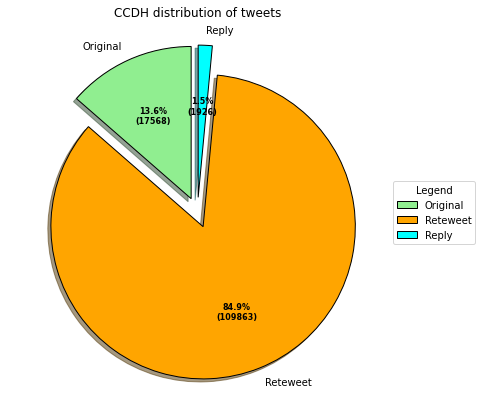

In [67]:
tweets_utils.print_pie_chart3("CCDH distribution of tweets", "Original", "Reteweet", "Reply", 
    len_original, len_rt, len_rp)

#### Verified

In [107]:
tweets_utils.stats(total_len_v, len_original_v, len_rt_v, len_rp_v)

Number of total tweets: 1687343
Number of original tweets: 1003621
Number of retweet: 573672
Number of reply: 110050
Number of original_tweets: 59.48% of total tweets
Number of retweets: 34.0% of total tweets
Number of replies: 6.52% of total tweets
Check sum == len(tweets):  True


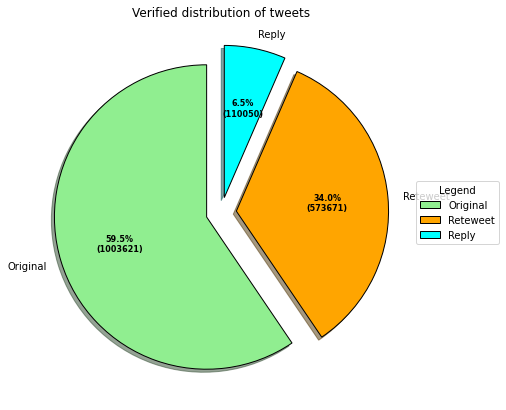

In [108]:
tweets_utils.print_pie_chart3("Verified distribution of tweets", "Original", "Reteweet", "Reply", 
    len_original_v, len_rt_v, len_rp_v)

### CCDH Top Users

In [72]:
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv")
disinform["screen_name"]

0             mercola
1     RobertKennedyJr
2         TyCharleneB
3             BusyDrT
4          IslamRizza
5            DrButtar
6      unhealthytruth
7          sayerjigmi
8       KellyBroganMD
9     DrChrisNorthrup
10       DrBenTapper1
11       kevdjenkins1
Name: screen_name, dtype: object

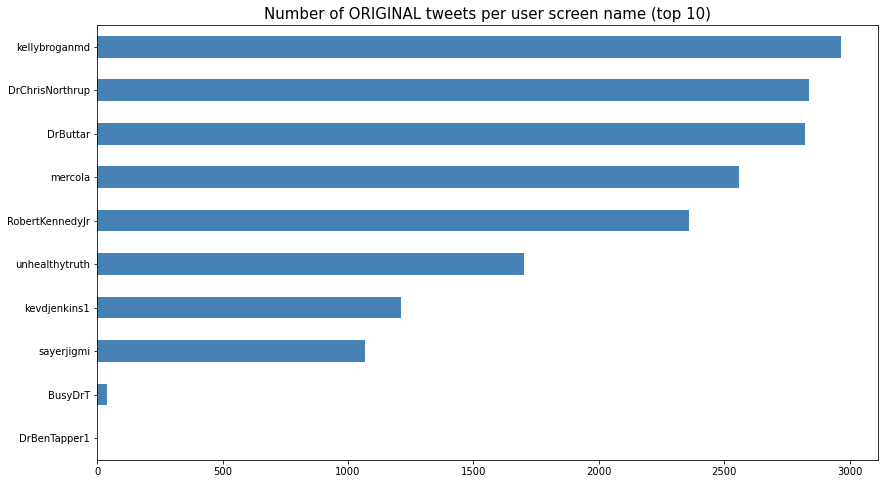

In [89]:
val = pd.Series(original["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:10].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

In [80]:
importlib.reload(tweets_utils)
val = pd.Series(retweet["user_screen_name"])
value_d = []
value_u = []
for i in val:
    if(tweets_utils.found(i, disinform["screen_name"])):
        value_d.append(i)
    else:
        value_u.append(i)

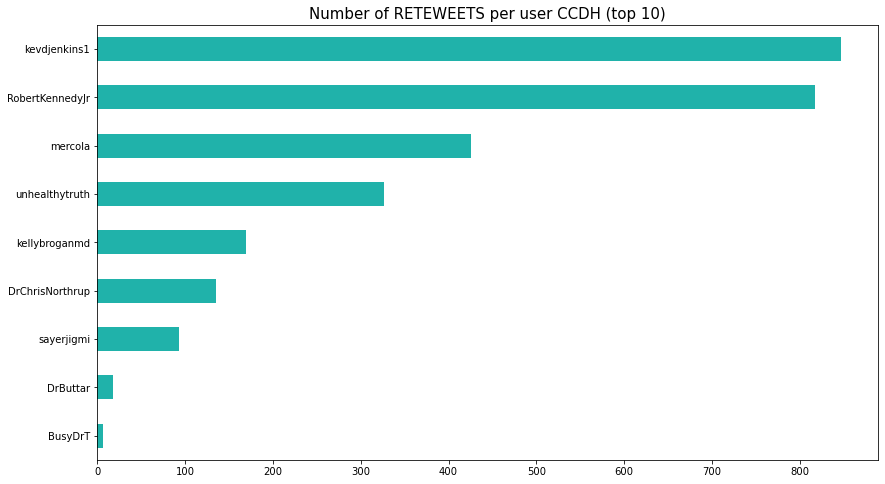

In [86]:
val = pd.Series(value_d)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:11].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user CCDH (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

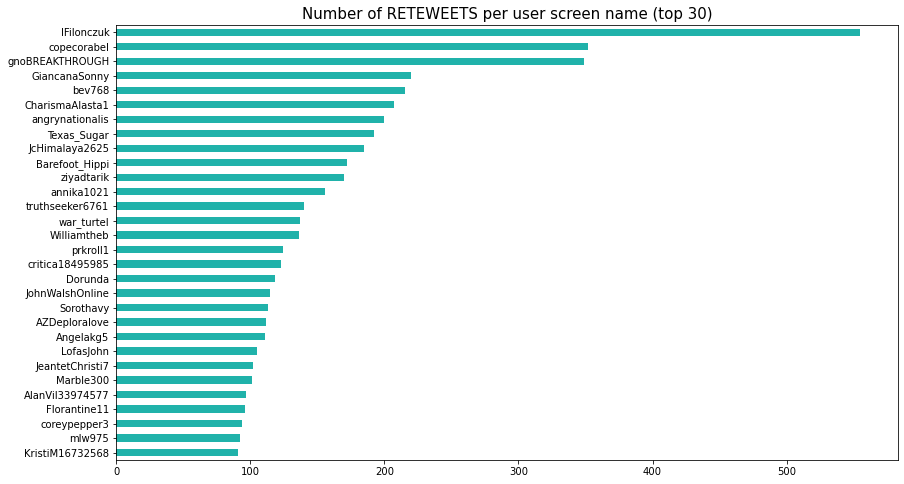

In [88]:
val = pd.Series(value_u)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

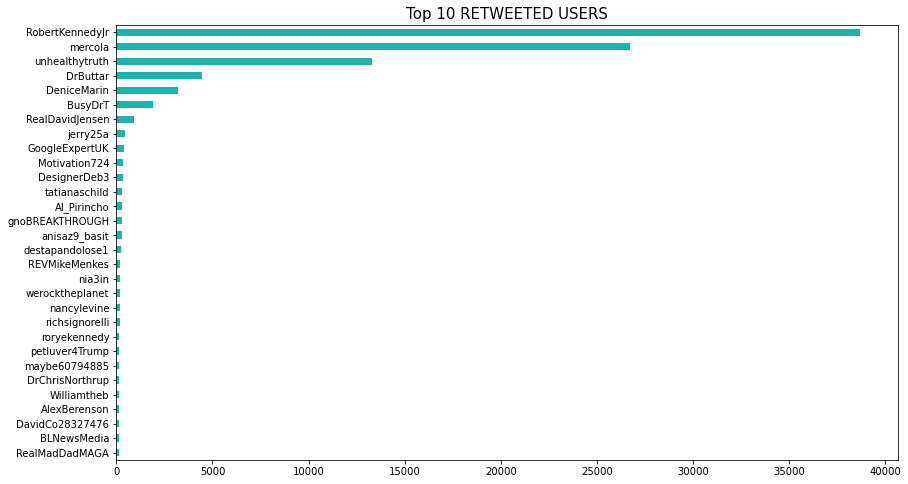

In [101]:
val = pd.Series(retweet["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

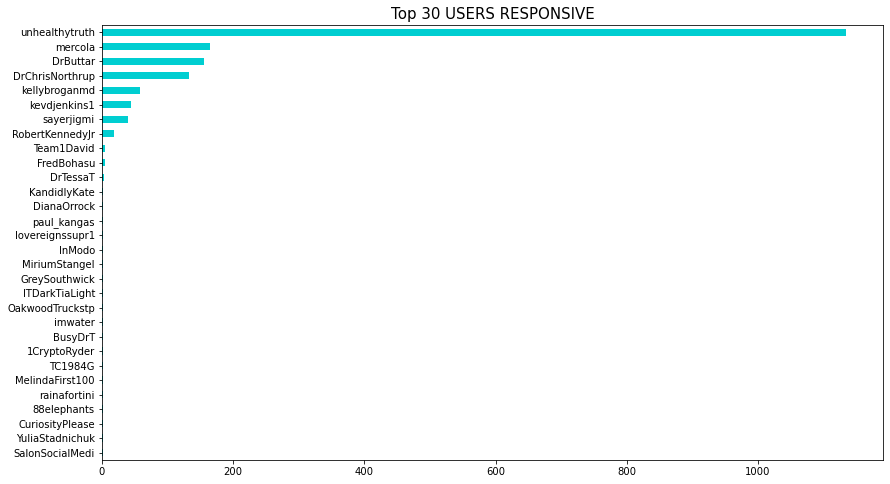

In [116]:
val = pd.Series(reply["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

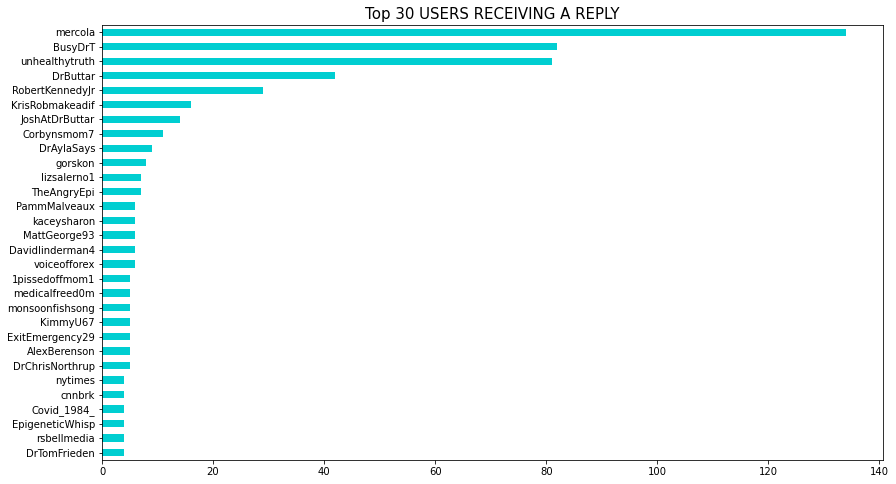

In [115]:
val = pd.Series(reply["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

### Verified Top Users

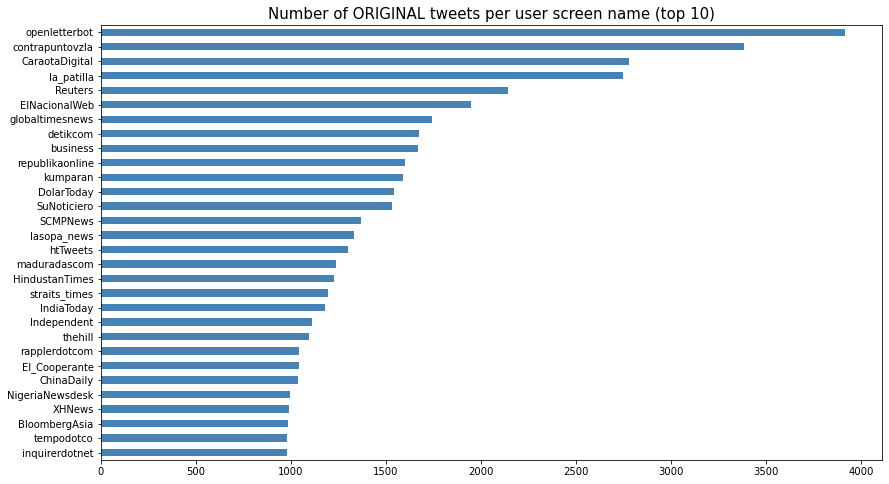

In [118]:
val = pd.Series(original_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

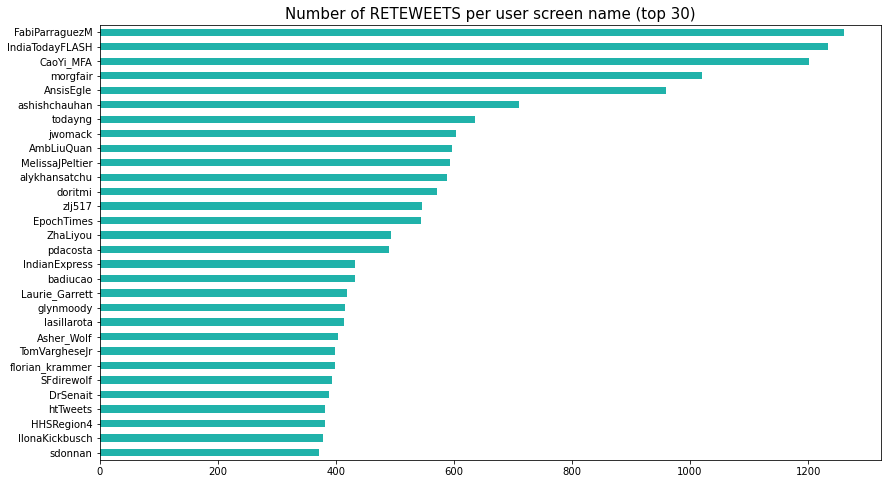

In [119]:
val = pd.Series(retweet_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

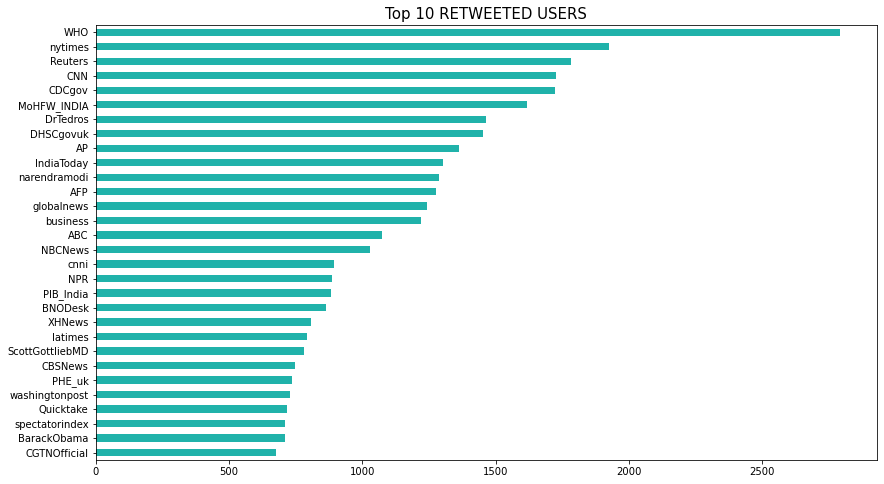

In [120]:
val = pd.Series(retweet_v["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

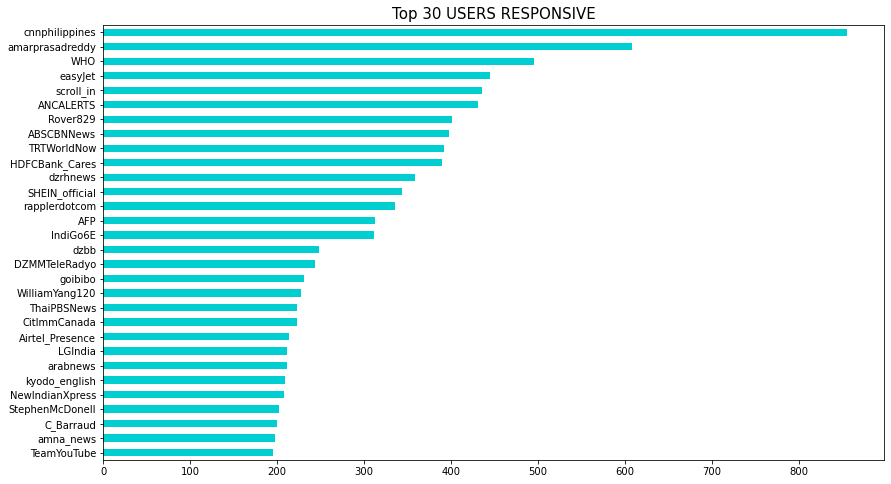

In [121]:
val = pd.Series(reply_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

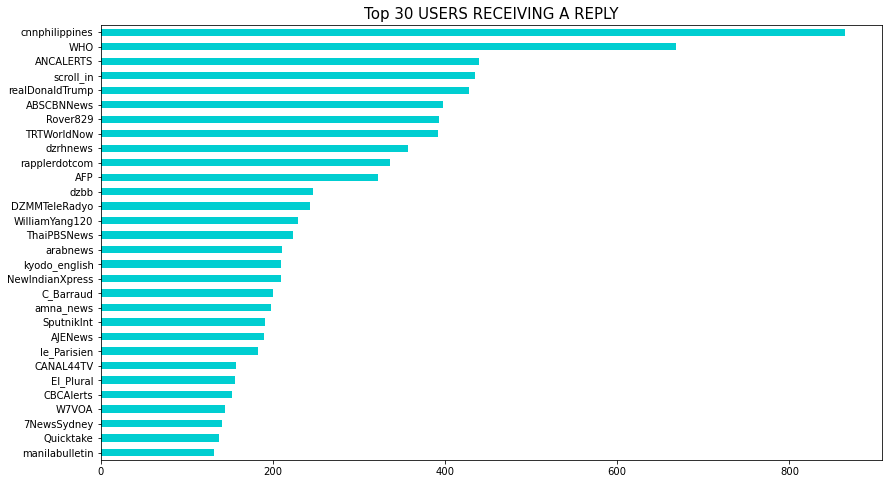

In [123]:
val = pd.Series(reply_v["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()